In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Get the Set3 colormap
set3 = plt.cm.get_cmap('Set3', 12)  # Set3 palette can have up to 12 distinct colors

# Extract the RGB values for the palette and convert to hexadecimal
hex_colors = []
for i in range(set3.N):
    rgb = set3(i)[:3]  # Get RGB values
    hex_colors.append('#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)))

print(hex_colors)

['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']


/tmp/ipykernel_3324/2423084141.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  set3 = plt.cm.get_cmap('Set3', 12)  # Set3 palette can have up to 12 distinct colors


In [3]:
# Define the path to the directory containing the csv files
path = "../../Data/Interpolated_soil_all"

# Create a list to hold all the dataframes
all_dfs = []

# Loop over all csv files in the directory
for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        # Extract the year from the file name
        year = file_name.split("_")[2]

        # Load the csv file into a pandas dataframe
        df = pd.read_csv(os.path.join(path, file_name))

        # Convert 'PlotID' to numeric, errors='coerce' will turn non-numeric values into NaN
        df['PlotID'] = pd.to_numeric(df['PlotID'], errors='coerce')
        
        # Filter rows where 'PlotID' > 0
        df = df[df['PlotID'] > 0]

        # Add a 'year' column
        df['Year'] = year

        # Append the dataframe to the list
        all_dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

In [4]:
combined_df.shape

(11209, 114)

In [5]:
# Define the treatment values
treatments = {
    "16A": {
        "low": {"plots": ['3', '10', '18'], "value": 11.3},
        "medium": {"plots": ['7', '14', '15'], "value": 22.5},
        "high": {"plots": ['6', '11', '19'], "value": 33.8}
    },
    "6-12": {
        "low": {"plots": ['6', '10', '20'], "value": 16.9},
        "medium": {"plots": ['4', '14', '18'], "value": 22.5},
        "high": {"plots": ['8', '12', '16'], "value": 28.2}
    },
    "Y10": {
        "low": {"plots": ['5', '13', '21'], "value": 5.6},
        "medium": {"plots": ['3', '9', '15'], "value": 11.3},
        "high": {"plots": ['7', '15', '19'], "value": 16.9}
    },
    "Y8": {
        "low": {"plots": ['5', '7', '21', '23'], "value": 3.4},
        "medium": {"plots": ['10', '12', '18', '20'], "value": 6.8},
        "high": {"plots": ['13', '15', '26', '28'], "value": 10.1}
    },
    "SW16": {
        "low": {"plots": ['3', '11', '13'], "value": 9},
        "medium": {"plots": ['1', '9', '15'], "value": 18},
        "high": {"plots": ['5', '7', '17'], "value": 27}
    }
}

# Convert the PlotID column back to string as the data in treatments is in string format
combined_df['PlotID'] = combined_df['PlotID'].astype(int).astype(str)

# Define a new column 'PhosphorusTreatment' and initialize it with NaN values
combined_df['PhosphorusTreatment'] = np.nan

# Loop through each row of the dataframe
for i, row in combined_df.iterrows():
    # Extract the FieldID and PlotID for the current row
    field_id = row['FieldID']
    plot_id = row['PlotID']
    
    # Check if the current FieldID exists in the treatments dictionary
    if field_id in treatments:
        # Loop through all treatment levels for the current FieldID
        for level in treatments[field_id].values():
            # Check if the current PlotID exists in the list of plots for the current treatment level
            if plot_id in level['plots']:
                # If there is a match, assign the corresponding value to the 'PhosphorusTreatment' column
                combined_df.loc[i, 'PhosphorusTreatment'] = level['value']

combined_df['PhosphorusTreatment'] = combined_df['PhosphorusTreatment'].fillna(0)

# List of columns to drop
columns_to_drop = ['BUFF_DIST', 'ORIG_FID', 'Size']

# Use the 'drop' function to drop the columns
combined_df = combined_df.drop(columns=columns_to_drop)
nan_count = combined_df.isna().sum().sum()
nan_count_1 = combined_df['Ols_As_0_2'].isna().sum()
nan_count_2 = combined_df['Ols_As_2_6'].isna().sum()
print(nan_count, nan_count_1 + nan_count_2)
combined_df = combined_df[['OID_', 'Join_Count', 'TARGET_FID', 'Longitude', 'Latitude',
       'Yield', 'Moisture', 'PlotID', 'FieldID', 'elevation', 'slope',
       'aspect', 'TOC_0_2', 'TC_0_2', 'IC_0_2', 'TN_0_2', 
                           'DI_Al_0_2', 'DI_Ca_0_2', 'DI_Fe_0_2', 'DI_K_0_2', 'DI_Mg_0_2', 'DI_P_0_2', 
                           'H3A_Al_0_2', 'H3A_Ca_0_2', 'H3A_Fe_0_2', 'H3A_K_0_2', 'H3A_Mg_0_2', 'H3A_P_0_2',
                           'M3_Al_0_2', 'M3_Ca_0_2', 'M3_Fe_0_2', 'M3_K_0_2', 'M3_Mg_0_2', 'M3_P_0_2',
                           'Ols_Al_0_2', 'Ols_Ca_0_2', 'Ols_Fe_0_2', 'Ols_K_0_2', 'Ols_Mg_0_2', 'Ols_P_0_2',
                           'TOC_2_6', 'TC_2_6', 'IC_2_6', 'TN_2_6',
                           'DI_Al_2_6', 'DI_Ca_2_6', 'DI_Fe_2_6', 'DI_K_2_6', 'DI_Mg_2_6', 'DI_P_2_6', 
                           'H3A_Al_2_6', 'H3A_Ca_2_6', 'H3A_Fe_2_6', 'H3A_K_2_6', 'H3A_Mg_2_6', 'H3A_P_2_6', 
                           'M3_Al_2_6', 'M3_Ca_2_6', 'M3_Fe_2_6', 'M3_K_2_6', 'M3_Mg_2_6', 'M3_P_2_6',
                           'Ols_Al_2_6', 'Ols_Ca_2_6', 'Ols_Fe_2_6', 'Ols_K_2_6', 'Ols_Mg_2_6', 'Ols_P_2_6',
                           'Year', 'PhosphorusTreatment']]
combined_df = combined_df.fillna(0)

6785 4592


In [6]:
# Group by 'Year' and then standardize the 'Yield' within each group
scaler = StandardScaler()
def normalize_yield(group):
    scaled_values = scaler.fit_transform(group['Yield'].values.reshape(-1, 1))
    group['Normalized_Yield'] = scaled_values.flatten()  # Flattening the 2D array to 1D
    return group

combined_df = combined_df.groupby('Year').apply(normalize_yield)

/home/bostevens/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_3324/2762089873.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


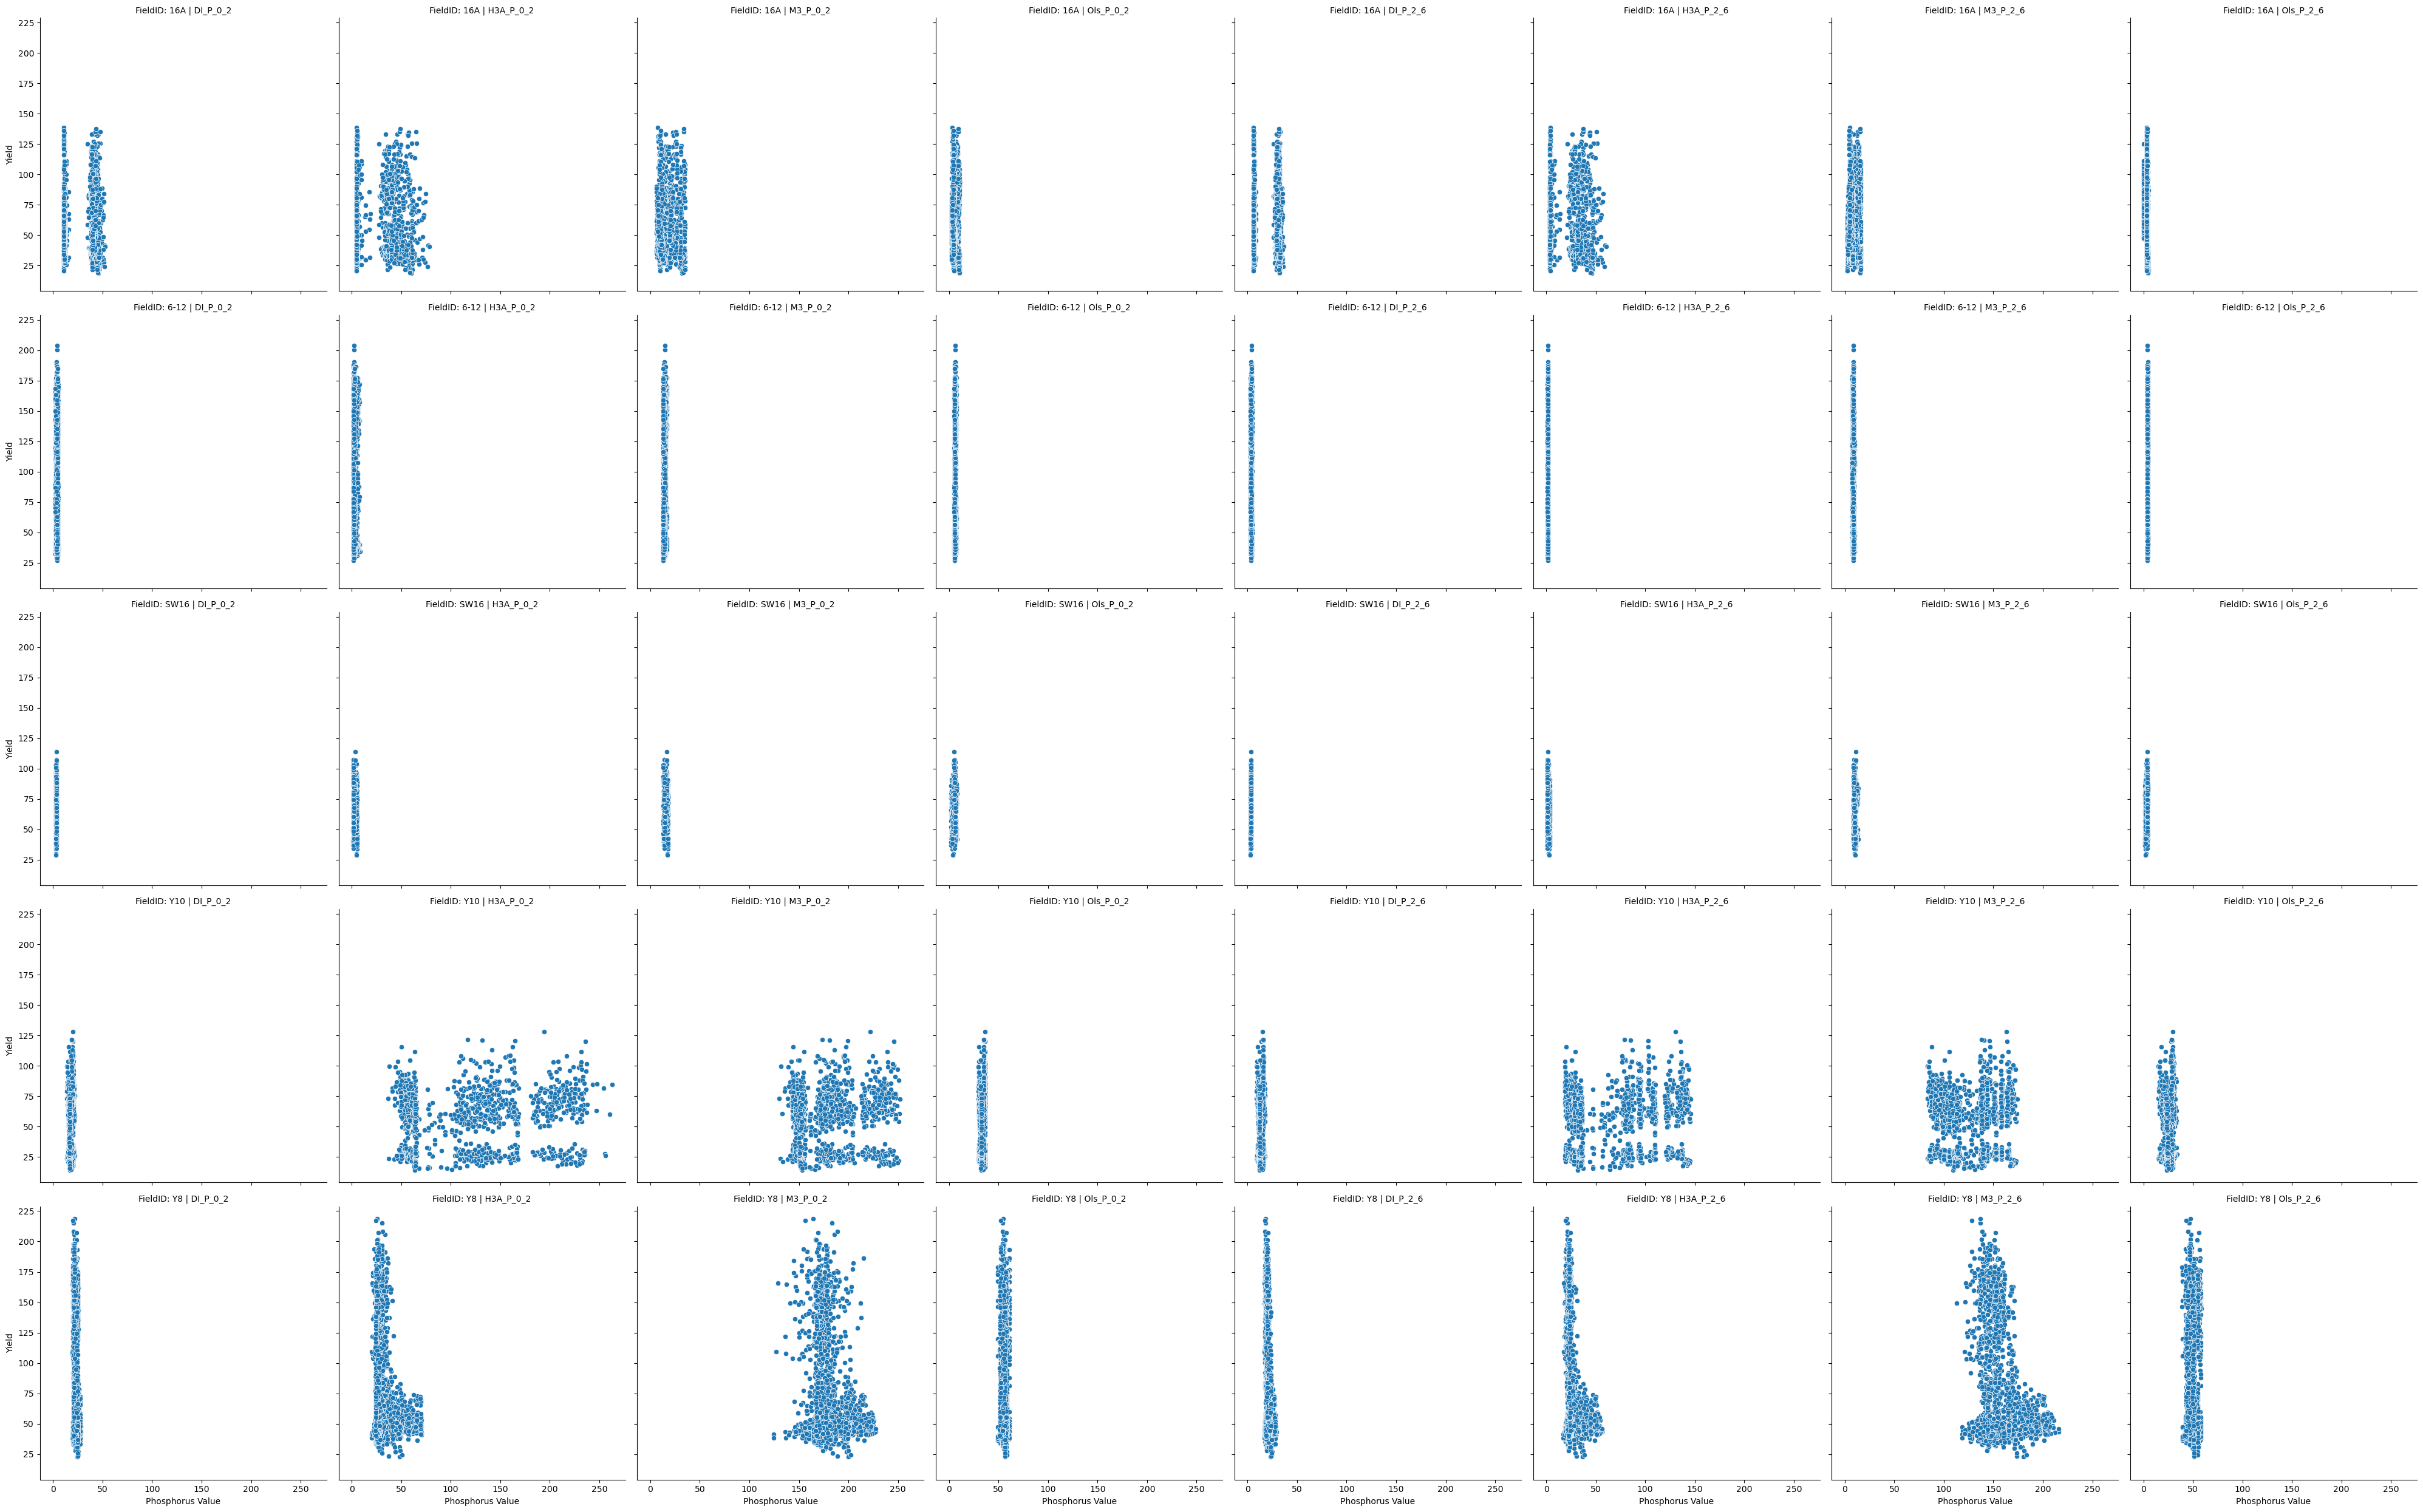

In [10]:
# Identify phosphorus-related columns
phosphorus_columns = [col for col in combined_df.columns if '_P_' in col]

combined_df_controls = combined_df[combined_df['PhosphorusTreatment'] == 0]

# Melt the DataFrame so that each phosphorus column becomes a separate observation
melted_df = combined_df_controls.melt(id_vars=['Yield', 'FieldID'], value_vars=phosphorus_columns, 
                              var_name='Phosphorus_Type', value_name='Phosphorus_Value')

# Use sns.relplot to create the grid of plots
g = sns.relplot(data=melted_df, x='Phosphorus_Value', y='Yield', 
                col='Phosphorus_Type', row='FieldID', kind='scatter')

# Customize the plots, if needed
g.set_titles(col_template='{col_name}', row_template='FieldID: {row_name}')
g.set_axis_labels('Phosphorus Value', 'Yield')
plt.tight_layout()
# plt.savefig('../tmp_figure.jpg', dpi = 300)